In [1]:
# Import needed modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from Constants import *

In [2]:
df = pd.read_csv(MAIN_FILE)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.rename({'default.payment.next.month' : "default"}, axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.drop("ID", axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.shape

(30000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

##### Identifying unique values
- Education has unique values 1, 2, 3 & 4, anything else must be dealt with.
- Sex has 1, 2.
- Marriage has 1, 2, 3.

In [8]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [9]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
df["SEX"].unique()

array([2, 1], dtype=int64)

- There are missing or unidentified values.
- Education and marriage doesn't support 0 values, hence we remove them.

In [11]:
len(df.loc[(df["EDUCATION"] == 0 ) | (df["MARRIAGE"] == 0)])

68

In [12]:
df = df.loc[(df["EDUCATION"] != 0) & (df["MARRIAGE"] != 0)]
df.shape

(29932, 24)

In [13]:
# Checking to see unknown values have been removed

print(df["EDUCATION"].unique())
print(df["MARRIAGE"].unique())

[2 1 3 5 4 6]
[1 2 3]


##### Downsampling the data
- This is done to reduce the size of the datasets.
- Defaulters and non-defaulters will be considered for downsampling.

In [14]:
# Splitting the two categories.

df_default = df[df["default"] == 1]
df_no_default = df[df["default"] == 0]

In [15]:
df_def_downsmpld = resample(df_default, replace = False, n_samples = 1000, random_state = 42)
df_def_downsmpld.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
19982,300000.0,2,1,1,47,3,2,2,2,2,...,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19350,80000.0,2,2,2,36,2,0,0,-2,-2,...,0.0,0.0,0.0,1700.0,0.0,0.0,0.0,0.0,0.0,1
17057,30000.0,2,3,2,22,2,2,0,0,0,...,29507.0,11609.0,11711.0,0.0,1687.0,1147.0,524.0,400.0,666.0,1
26996,80000.0,1,1,2,34,2,2,2,2,2,...,64682.0,65614.0,67007.0,2800.0,3000.0,2500.0,2600.0,2600.0,2600.0,1
23621,210000.0,2,3,1,44,-2,-2,-2,-2,-2,...,0.0,5646.0,14793.0,13462.0,17706.0,0.0,5646.0,14793.0,7376.0,1


In [16]:
df_no_def_downsmpld = resample(df_no_default, replace = False, n_samples = 1000, random_state = 42)
df_no_def_downsmpld.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
641,130000.0,2,3,1,28,0,0,0,0,-2,...,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0,0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0,0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0,0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0,0


In [17]:
# Joining the two

df = pd.concat([df_def_downsmpld, df_no_def_downsmpld])
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
18942,150000.0,2,1,1,31,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29836,180000.0,1,6,1,34,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19424,90000.0,2,1,2,33,-1,-1,-1,-1,-1,...,3000.0,3000.0,3000.0,6000.0,0.0,3000.0,3000.0,3000.0,3000.0,0
25593,120000.0,2,3,1,38,0,0,0,0,0,...,119719.0,118042.0,120682.0,5720.0,5820.0,5670.0,4250.0,4450.0,4470.0,0
5859,20000.0,1,1,2,27,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# Splitting data

X = df.drop("default", axis = 1).copy()

In [19]:
y = df["default"].copy()

In [20]:
# Encoding categorical columns

X = pd.get_dummies(X, columns = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"])
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000.0,47,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
19350,80000.0,36,19671.0,20650.0,0.0,0.0,0.0,0.0,1700.0,0.0,...,False,True,False,False,False,False,False,False,False,False
17057,30000.0,22,29793.0,29008.0,29047.0,29507.0,11609.0,11711.0,0.0,1687.0,...,False,False,False,True,False,False,False,False,False,False
26996,80000.0,34,61231.0,62423.0,63827.0,64682.0,65614.0,67007.0,2800.0,3000.0,...,False,False,False,False,True,False,False,False,False,False
23621,210000.0,44,11771.0,13462.0,17706.0,0.0,5646.0,14793.0,13462.0,17706.0,...,False,True,False,False,False,False,False,False,False,False


In [21]:
# Scaling the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train = scale(X_train)
X_test = scale(X_test)

In [22]:
svm_class = SVC(random_state = 42)
svm_class.fit(X_train, y_train)
preds = svm_class.predict(X_test)

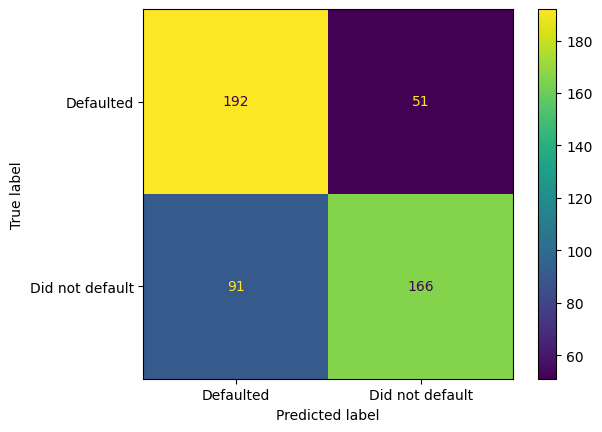

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Defaulted", "Did not default"])

conf_mat.plot()
plt.show()

In [24]:
# Parameter optimization with CV and GridSearch

params_grid = [
    {'C': [0.25, 0.5, 1, 10, 100], 
     'gamma': ['scale', 10, 1, 0.5, 0.1, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    params_grid,
    cv = 5,
    scoring = "accuracy",
    verbose = 0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [25]:
# Applying optimal parameters

svm_class = SVC(random_state = 42, C = 100, gamma = 0.001)
svm_class.fit(X_train, y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [26]:
xgb_class = XGBClassifier(learning_rate = 0.02, n_estimators = 600, objective = 'binary:logistic',
                    silent = True, nthread=1)
xgb_class.fit(X_train, y_train)
preds = xgb_class.predict(X_test)


[17:50:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [40]:
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 10

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

skf = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 1001)

optimal_params = GridSearchCV(xgb_class,
                              params,
                              #param_comb,
                              #n_jobs = 4,
                              scoring = 'accuracy',
                              cv = skf.split(X_train,y_train),
                              verbose = 0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
print(optimal_params.best_estimator_)

{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, nthread=1, num_parallel_tree=None,
              predictor=None, ...)


In [ ]:
# Parameter optimization with CV and GridSearch
'''
params_grid = [
    {'learning_rate': [0.5, 0.25, 0.025, 0.1, 0.01, 0.001, 0.005],
     'callbacks' : [0.25, 0.3, 0.5] ,
     'n_estimator' : [50, 100, 250, 500, 1000],
     'gamma': [10, 1, 0.5, 0.1, 0.001, 0.0001],
     'max_depth': [3, 4, 5, 8, 10]},
]

optimal_params = GridSearchCV(
    XGBClassifier(),
    params_grid,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1,
    verbose = 0
    )
    
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
print(optimal_params.best_estimator_)
'''

In [35]:
preds = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print("Accuracy: ", accuracy)

NameError: name 'best_estimator_' is not defined

In [ ]:
# Visualising data using PCA

pca = PCA()
X_train = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1, len(per_var) + 1), height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)

plt.ylabel("Explained Variance Percentage")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()